#Data Mining Method

> 缩进块




##KNN
using sample dataset with a size of 5000 records, and get the accuracy score of 0.7016

In [ ]:
%%capture
!pip install dmba

In [ ]:
# Data processing and visualization
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# File upload
from google.colab import files

# KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.metrics import classification_report

# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import graphviz

# Random Forest
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import sklearn.linear_model as lm

# Neural Network
from sklearn.neural_network import MLPClassifier

no display found. Using non-interactive Agg backend


In [ ]:
# Upload data with 5000 records
file = files.upload()
df = pd.read_csv('sampled_cardio_clean.csv')
df.head()

Saving sampled_cardio_clean.csv to sampled_cardio_clean (1).csv


,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,48,2,166,70.0,150,90,1,1,0,0,0,1
1,45,2,170,92.0,125,85,1,1,0,0,1,0
2,63,1,151,55.0,130,80,1,1,0,0,1,0
3,52,2,168,85.0,110,70,1,1,0,1,1,0
4,49,1,165,82.0,110,80,1,1,0,0,1,0


**Trying KNN model on heart disease data**

In [ ]:
# Data Preprocessing for KNN
## Dummy coding 
df_dummy = pd.get_dummies(df, columns=['gender','cholesterol','glucose'], prefix_sep='_')
df_dummy = df_dummy.rename(columns={'gender_1':'female', 'gender_2': 'male', 'cholesterol_1' : 'low_C' , 'cholesterol_2': 'med_C', 'cholesterol_3': 'high_C',
                              'glucose_1' : 'low_G', 'glucose_2' : 'med_G', 'glucose_3' : 'high_G'})
display(df_dummy.head())

# Partition the data into 75% training and 25% validation set.
trainData,validData = train_test_split(df_dummy, test_size = 0.25, random_state = 1)

# Get the mean and varaince of train data
predictors_no_dummies = ['age', 'height', 'weight', 'systolic_blood_pressure','diastolic_blood_pressure']
predictors_dummies = ['female', 'male', 'low_C', 'med_C', 'high_C', 'low_G', 'med_G', 'high_G', 'smoke', 'alcohol', 'physical_activity']
response = ['heart_disease']
scaler = StandardScaler()
scaler.fit(trainData[predictors_no_dummies])

# Get a whole normalized data
# Normalize train data and normalize data based on mean, variance value of train data
df_normalize = pd.concat((pd.DataFrame(scaler.transform(df_dummy[predictors_no_dummies]), columns=predictors_no_dummies), \
                    df_dummy[predictors_dummies], df_dummy[response]), axis=1)
df_normalize.head()

,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,smoke,alcohol,physical_activity,heart_disease,female,male,low_C,med_C,high_C,low_G,med_G,high_G
0,48,166,70.0,150,90,0,0,0,1,0,1,1,0,0,1,0,0
1,45,170,92.0,125,85,0,0,1,0,0,1,1,0,0,1,0,0
2,63,151,55.0,130,80,0,0,1,0,1,0,1,0,0,1,0,0
3,52,168,85.0,110,70,0,1,1,0,0,1,1,0,0,1,0,0
4,49,165,82.0,110,80,0,0,1,0,1,0,1,0,0,1,0,0


,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,female,male,low_C,med_C,high_C,low_G,med_G,high_G,smoke,alcohol,physical_activity,heart_disease
0,-0.728639,0.193052,-0.281750,1.412886,0.900982,0,1,1,0,0,1,0,0,0,0,0,1
1,-1.176353,0.705397,1.245665,-0.096109,0.386566,0,1,1,0,0,1,0,0,0,0,1,0
2,1.509930,-1.728244,-1.323169,0.205690,-0.127849,1,0,1,0,0,1,0,0,0,0,1,0
3,-0.131688,0.449224,0.759669,-1.001506,-1.156680,0,1,1,0,0,1,0,0,0,1,1,0
4,-0.579401,0.064965,0.551385,-1.001506,-0.127849,1,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
# Model, Prediction Performance & best k choice
train_Norm = df_normalize.iloc[trainData.index]
valid_Norm = df_normalize.iloc[validData.index]

train_X = train_Norm.drop(columns=response)
train_y = train_Norm[response]
valid_X = valid_Norm.drop(columns=response)
valid_y = valid_Norm[response]

train_rel = []; test_rel = [];
for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = k).fit(train_X,train_y)
  train_rel.append({
      'k':k,
      'score': accuracy_score(train_y, knn.predict(train_X)),
  })
  test_rel.append({
      'k':k,
      'score': accuracy_score(valid_y, knn.predict(valid_X)),
  })

train_rel = pd.DataFrame(train_rel)
test_rel = pd.DataFrame(test_rel)
print(train_rel, '\n', test_rel)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

    k     score
0   1  0.997067
1   2  0.822933
2   3  0.825333
3   4  0.788267
4   5  0.784000
5   6  0.770933
6   7  0.776267
7   8  0.764267
8   9  0.768267
9  10  0.764000 
     k   score
0   1  0.6512
1   2  0.6488
2   3  0.6696
3   4  0.6800
4   5  0.7016
5   6  0.7000
6   7  0.7032
7   8  0.7008
8   9  0.7096
9  10  0.7072


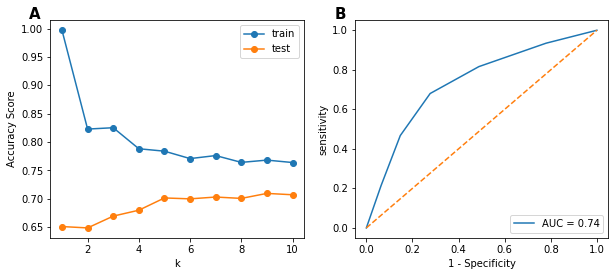

In [ ]:
# Plot train, test acc vs. k
%matplotlib inline
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].plot(train_rel.k, train_rel.score, marker='o', label='train')
axes[0].plot(test_rel.k, test_rel.score, marker='o', label='test')
axes[0].set(xlabel='k', ylabel='Accuracy Score')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels)


# cut off
knn = KNeighborsClassifier(n_neighbors=5).fit(train_X, np.ravel(train_y))
y_scores = knn.predict_proba(valid_X)
fpr, tpr, threshold = roc_curve(valid_y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
axes[1].legend(loc = 'lower right')
axes[1].plot([0, 1], [0, 1],'--')
axes[1].set(xlabel='1 - Specificity', ylabel='sensitivity')

fig.text(0.095, 0.9, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.519, 0.9, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
plt.show()

fig.savefig('k_cutoff_knn')

In [ ]:
# Prediction accuray under best k
knn = KNeighborsClassifier(n_neighbors=5).fit(train_X, np.ravel(train_y))
classificationSummary(valid_y, knn.predict(valid_X))
knn.score(valid_X,valid_y)

Confusion Matrix (Accuracy 0.7016)

       Prediction
Actual   0   1
     0 452 173
     1 200 425


0.7016

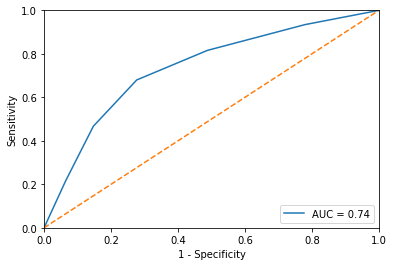

In [ ]:
# ROC and Optimal Cutoff
y_scores = knn.predict_proba(valid_X)
fpr, tpr, threshold = roc_curve(valid_y, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1 - Specificity')
plt.show()

##Decision Tree

using the whole dataset with 5000 rows

In [ ]:
# Load Dataset
file = files.upload()
df_sample = pd.read_csv('sampled_cardio_clean.csv')
df_sample.head()

# Data Preprocessing
## Get dummies and rename the columns as we have done before, but apply on the whole dataset this time
## Dummy coding 
df_sample_dummy = pd.get_dummies(df_sample, columns=['gender','cholesterol','glucose'], prefix_sep='_')
df_sample_dummy = df_sample_dummy.rename(columns={'gender_1':'female', 'gender_2': 'male', 'cholesterol_1' : 'low_C' , 'cholesterol_2': 'med_C', 'cholesterol_3': 'high_C',
                              'glucose_1' : 'low_G', 'glucose_2' : 'med_G', 'glucose_3' : 'high_G'})
# display(df_sample_dummy.head())

# No Normalization

# Partition the data into 75% training and 25% validation set.
X = df_sample_dummy.drop(columns=['heart_disease'])
y = df_sample_dummy['heart_disease']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = 1)

# Get a full tree, then test the accuracy
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

# Model, prediction Performance
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))


Saving sampled_cardio_clean.csv to sampled_cardio_clean.csv
Confusion Matrix (Accuracy 0.9976)

       Prediction
Actual    0    1
     0 1927    1
     1    8 1814
Confusion Matrix (Accuracy 0.6408)

       Prediction
Actual   0   1
     0 393 232
     1 217 408


using the whole dataset with 68,414 rows

In [ ]:
# Load Dataset
file = files.upload()
df_full = pd.read_csv('cardio_clean.csv')
df_full.head()

Saving cardio_clean.csv to cardio_clean.csv


,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Data Preprocessing
## Get dummies and rename the columns as we have done before, but apply on the whole dataset this time
## Dummy coding 
df_full_dummy = pd.get_dummies(df_full, columns=['gender','cholesterol','glucose'], prefix_sep='_')
df_full_dummy = df_full_dummy.rename(columns={'gender_1':'female', 'gender_2': 'male', 'cholesterol_1' : 'low_C' , 'cholesterol_2': 'med_C', 'cholesterol_3': 'high_C',
                              'glucose_1' : 'low_G', 'glucose_2' : 'med_G', 'glucose_3' : 'high_G'})
display(df_full_dummy.head())

# No Normalization

# Partition the data into 75% training and 25% validation set.
X = df_full_dummy.drop(columns=['heart_disease'])
y = df_full_dummy['heart_disease']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = 1)

,id,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,smoke,alcohol,physical_activity,heart_disease,female,male,low_C,med_C,high_C,low_G,med_G,high_G
0,0,50,168,62.0,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,1,55,156,85.0,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,2,51,165,64.0,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,3,48,169,82.0,150,100,0,0,1,1,0,1,1,0,0,1,0,0
4,4,47,156,56.0,100,60,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
# Get a full tree, then test the accuracy
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

# Plot the tree  
## it runs so long as the numerous records
# dot_data = tree.export_graphviz(fullClassTree, class_names=['0', '1'], out_file=None)
# graph = graphviz.Source(dot_data)
# graph

# Model, prediction Performance
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 25897     0
     1     0 25413
Confusion Matrix (Accuracy 0.6353)

       Prediction
Actual    0    1
     0 5566 3118
     1 3120 5300


In [ ]:
# Compute validation accuracy using 5-fold cross-validation on the full tree
crossTreeClassifier = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(crossTreeClassifier, train_X, train_y, cv=5)
print('Accuracy of each fold:\n ', [f'{acc:0.3f}' for acc in scores])
print(f'Avg accuracy: {np.average(scores):.3f}')

Accuracy of each fold:
  ['0.634', '0.625', '0.627', '0.628', '0.621']
Avg accuracy: 0.627


In [ ]:
# Avoid overfitting by set the max_depth, min_records, and min_impurity_decrease
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)

# Model, prediction Performance
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7123)

       Prediction
Actual     0     1
     0 20881  5016
     1  9747 15666
Confusion Matrix (Accuracy 0.7154)

       Prediction
Actual    0    1
     0 7017 1667
     1 3200 5220


In [ ]:
# Grid search to find the optimal parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1) 
gridSearch.fit(train_X, train_y)
print('Initial score:', gridSearch.best_score_)
print('Initial parameters:', gridSearch.best_params_)

# Adapt grid based the grid search result
# Grid search to find the optimal parameters
param_grid = {
    'max_depth': list(range(2,16)),
    'min_samples_split': list(range(10,22)), 
    'min_impurity_decrease': [0.0004, 0.0005, 0.0006],
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1) 
gridSearch.fit(train_X, train_y)
print('Improved score:', gridSearch.best_score_)
print('Improved parameters:', gridSearch.best_params_)

# best tree and prediction performance
bestClassTree = gridSearch.best_estimator_
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Initial score: 0.7290196842720718
Initial parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
Improved score: 0.7299746638082245
Improved parameters: {'max_depth': 6, 'min_impurity_decrease': 0.0004, 'min_samples_split': 10}
Confusion Matrix (Accuracy 0.7309)

       Prediction
Actual     0     1
     0 20380  5517
     1  8292 17121
Confusion Matrix (Accuracy 0.7318)

       Prediction
Actual    0    1
     0 6853 1831
     1 2757 5663


In [ ]:
rep = classification_report(valid_y, bestClassTree.predict(valid_X), output_dict= True) 
rep = pd.DataFrame(rep).rename(columns={'0':'no-disease','1':'disease'}).transpose()
display(rep)

,precision,recall,f1-score,support
no-disease,0.713111,0.789152,0.749207,8684.000000
disease,0.755671,0.672565,0.711700,8420.000000
accuracy,0.731759,0.731759,0.731759,0.731759
macro avg,0.734391,0.730859,0.730454,17104.000000
weighted avg,0.734063,0.731759,0.730743,17104.000000


#Random Forest

In [ ]:
# Fit a random forest classifier and get the model and prediction performance
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
classificationSummary(train_y, rf.predict(train_X))
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 25897     0
     1     0 25413
Confusion Matrix (Accuracy 0.7243)

       Prediction
Actual    0    1
     0 6491 2193
     1 2523 5897


,feature,importance
0,id,0.217247
4,systolic_blood_pressure,0.169195
3,weight,0.157688
2,height,0.140761
1,age,0.133046
5,diastolic_blood_pressure,0.083180
11,low_C,0.016924
13,high_C,0.015329
8,physical_activity,0.013821
6,smoke,0.008520


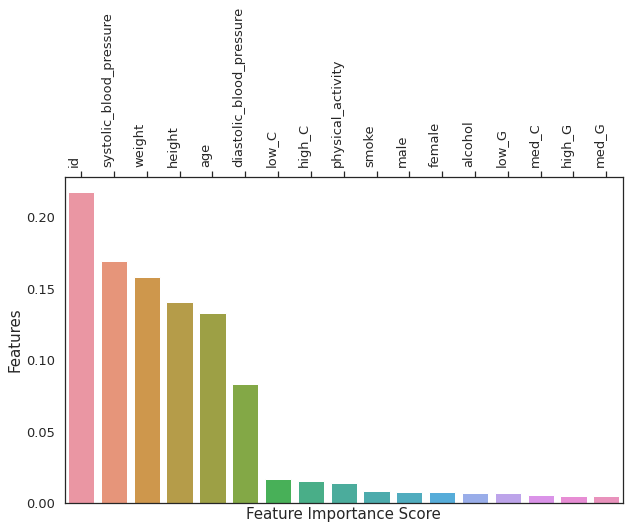

In [ ]:
from IPython.core.pylabtools import figsize
# Variable importance plot
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(train_X.columns), "importance": rf.feature_importances_}
).sort_values("importance", ascending=False)

# Display
display(feature_importances_df)

# visualize important featuers
# Creating a bar plot
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('white')
sns_plot = sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your
plt.xlabel("Feature Importance Score", fontsize=15)
plt.ylabel("Features", fontsize=15)
plt.yticks(fontsize=13)
# plt.title("Visualizing Important Features")
sns_plot.xaxis.set_ticks_position('top')
plt.xticks(
    rotation=90, horizontalalignment="right", fontweight="light", fontsize=13
)


plt.show()


sns_plot.figure.savefig('features_importance')

## boosted trees

In [ ]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, rf.predict(valid_X))

NameError: ignored

#Logistic Regression

In [ ]:
# Load Dataset
file = files.upload()
df_full = pd.read_csv('cardio_clean.csv')
df_full.head()

Saving cardio_clean.csv to cardio_clean (2).csv


,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Data Preprocessing
# Get dummies and rename the columns as we have done before, but apply on the whole dataset this time
# Dummy coding

df_full_dummy = pd.get_dummies(df_full, columns=['gender','cholesterol','glucose'], prefix_sep='_', drop_first=True)
df_full_dummy = df_full_dummy.rename(columns={'gender_1':'female', 'gender_2': 'male', 'cholesterol_1' : 'low_C' , 'cholesterol_2': 'med_C', 'cholesterol_3': 'high_C',
                              'glucose_1' : 'low_G', 'glucose_2' : 'med_G', 'glucose_3' : 'high_G'})
df_full_dummy.drop(columns='id', inplace=True)
display(df_full_dummy.head())

# No Normalization

# Partition the data into 75% training and 25% validation set.
X = df_full_dummy.drop(columns=['heart_disease'])
y = df_full_dummy['heart_disease']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = 1)

,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,smoke,alcohol,physical_activity,heart_disease,male,med_C,high_C,med_G,high_G
0,50,168,62.0,110,80,0,0,1,0,1,0,0,0,0
1,55,156,85.0,140,90,0,0,1,1,0,0,1,0,0
2,51,165,64.0,130,70,0,0,0,1,0,0,1,0,0
3,48,169,82.0,150,100,0,0,1,1,1,0,0,0,0
4,47,156,56.0,100,60,0,0,0,0,0,0,0,0,0


Confusion Matrix (Accuracy 0.7278)

       Prediction
Actual     0     1
     0 20396  5501
     1  8467 16946
Confusion Matrix (Accuracy 0.7297)

       Prediction
Actual    0    1
     0 6891 1793
     1 2831 5589
intercept:  -10.906415356206283
                          coefficient
age                          0.050700
height                      -0.003012
weight                       0.010756
systolic_blood_pressure      0.056000
diastolic_blood_pressure     0.011251
smoke                       -0.131320
alcohol                     -0.235414
physical_activity           -0.216164
male                        -0.010612
med_C                        0.369231
high_C                       1.084887
med_G                        0.052190
high_G                      -0.351904
count    51310.000000
mean        52.836932
std          6.766770
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64
Disease odds incre

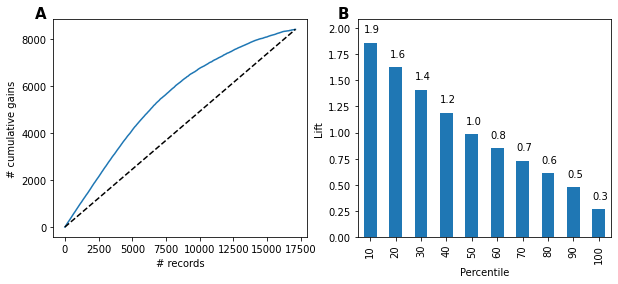

In [ ]:
%matplotlib inline
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

# Further explanation 
## coefficient & intercept
print('intercept: ', logit_reg.intercept_[0])
print(pd.DataFrame({'coefficient':logit_reg.coef_[0]},index=train_X.columns))

## odds
print(train_X.age.describe())
print('Disease odds increase per year older: ', math.exp(0.051))
print('Disease odds increase Smoke vs. nonSmoke: ', math.exp(-0.131320))

## cum gains and decile lift charts
logit_reg_predict = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_reg_result = pd.DataFrame({'actual': valid_y, 'predicted': logit_reg_predict, \
                  'p(0)': [p[0] for p in logit_reg_proba], \
                  'p(1)': [p[1] for p in logit_reg_proba]})
df = logit_reg_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
gainsChart(df.actual, ax = axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
fig.text(0.1, 0.9, "A", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
fig.text(0.52, 0.9, "B", weight="bold", horizontalalignment='left', verticalalignment='center', fontsize=15)
plt.show()

fig.savefig('gain_lift_chart')

In [ ]:
logit_reg = LogisticRegression(penalty='l1', C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.7277)

       Prediction
Actual     0     1
     0 20397  5500
     1  8472 16941
Confusion Matrix (Accuracy 0.7295)

       Prediction
Actual    0    1
     0 6890 1794
     1 2832 5588


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
logit_reg = LogisticRegression(penalty='none', C=1e42)
logit_reg.fit(train_X, train_y)
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Confusion Matrix (Accuracy 0.7167)

       Prediction
Actual     0     1
     0 19901  5996
     1  8538 16875
Confusion Matrix (Accuracy 0.7214)

       Prediction
Actual    0    1
     0 6725 1959
     1 2807 5613


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Performance Illustration


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']

penalty = ['l2']

c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(train_X, train_y)



print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Best: 0.727597 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


In [ ]:
classificationSummary(train_y, grid_result.predict(train_X))

classificationSummary(valid_y, grid_result.predict(valid_X))

Confusion Matrix (Accuracy 0.7280)

       Prediction
Actual     0     1
     0 20400  5497
     1  8461 16952
Confusion Matrix (Accuracy 0.7298)

       Prediction
Actual    0    1
     0 6892 1792
     1 2829 5591


## Neural Networks

In [ ]:
# Load Dataset
file = files.upload()
df_full = pd.read_csv('cardio_clean.csv')
df_full.head()

Saving cardio_clean.csv to cardio_clean (7).csv


,id,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df_full.drop(columns={'id'}, inplace=True)
df_numeric = df_full.loc[:, 'age':'diastolic_blood_pressure']
df_numeric_norm = (df_numeric - df_numeric.min()) / (df_numeric.max()-df_numeric.min())
df_category = df_full.loc[:, 'cholesterol':'heart_disease']
df_category.cholesterol[df_category.cholesterol==1] = 0
df_category.cholesterol[df_category.cholesterol==2] = 0.5
df_category.cholesterol[df_category.cholesterol==3] = 1
df_category.glucose[df_category.glucose==1] = 0
df_category.glucose[df_category.glucose==2] = 0.5
df_category.glucose[df_category.glucose==3] = 1
df_full = pd.concat([df_numeric_norm, df_category], axis=1)


# Partition
X = df_full.drop(columns=['heart_disease'])
y = df_full['heart_disease']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = 1)
display(df_full.glucose.unique())
df_full.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Setti

array([0. , 0.5, 1. ])

,age,gender,height,weight,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,physical_activity,heart_disease
0,0.600000,1.0,0.380952,0.269841,0.277778,0.436464,0.0,0.0,0,0,1,0
1,0.742857,0.0,0.190476,0.391534,0.444444,0.491713,1.0,0.0,0,0,1,1
2,0.628571,0.0,0.333333,0.280423,0.388889,0.381215,1.0,0.0,0,0,0,1
3,0.542857,1.0,0.396825,0.375661,0.500000,0.546961,0.0,0.0,0,0,1,1
4,0.514286,0.0,0.190476,0.238095,0.222222,0.325967,0.0,0.0,0,0,0,0


In [ ]:
# fit the model and get performance
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y)
clf.predict(valid_X)
classes = sorted(y.unique())
classificationSummary(valid_y, clf.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.7305)

       Prediction
Actual    0    1
     0 6735 1949
     1 2660 5760
